## Marketing Campaign

In [760]:
# Importing usefull libraries

%matplotlib inline

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
import sklearn

import datetime

# Reading a given dataset

Location = r'marketing_campaign.csv'

df = pd.read_csv(Location, sep='\t')
df.head(10)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


#### Preprocessing / Cleaning

In [761]:
df.iloc[700:750, 0:17]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases
700,9977,1973,Graduation,Divorced,78901.0,0,1,17-09-2013,99,321,11,309,33,26,34,3,9
701,10196,1978,Graduation,Married,71427.0,2,0,12-03-2014,26,212,123,177,15,64,23,2,8
702,6384,1978,Graduation,Divorced,71022.0,0,1,11-02-2014,30,909,12,278,0,12,242,3,5
703,8029,1988,Master,Single,90247.0,0,0,29-04-2014,27,1184,32,352,21,16,16,1,3
704,968,1968,Master,Divorced,41335.0,1,0,26-12-2013,24,112,19,21,16,14,5,3,4
705,6988,1986,Graduation,Married,71952.0,1,0,10-01-2013,93,656,80,455,52,107,93,2,8
706,4472,1970,PhD,Divorced,35682.0,1,0,27-06-2014,34,23,0,8,6,2,18,1,1
707,6991,1951,Graduation,Divorced,43185.0,0,1,10-04-2013,88,537,6,42,16,6,30,2,9
708,3336,1948,PhD,Together,66375.0,0,1,21-11-2013,96,712,0,45,0,0,191,3,2
709,4301,1971,Master,Married,35178.0,1,0,10-01-2013,10,23,1,13,2,2,18,1,1


In [762]:
# DateTime conversion

df["Dt_Customer"] = pd.to_datetime(df.Dt_Customer, format="%d-%m-%Y")
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [763]:
df["Education"].unique()
Education = df["Education"] == "2n Cycle"
df[Education]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
19,2278,1985,2n Cycle,Single,33812.0,1,0,2012-11-03,86,4,...,6,0,0,0,0,0,0,3,11,0
37,10755,1976,2n Cycle,Married,23718.0,1,0,2013-09-02,76,6,...,7,0,0,0,0,0,0,3,11,0
46,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,...,9,0,0,0,0,0,0,3,11,1
67,9369,1979,2n Cycle,Single,88194.0,0,1,2014-03-19,19,688,...,5,1,0,0,1,0,0,3,11,1
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,8722,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,38,556,...,3,1,0,0,1,0,0,3,11,1
2210,607,1955,2n Cycle,Divorced,41769.0,0,1,2013-02-13,31,302,...,8,0,0,0,0,0,0,3,11,0
2213,3661,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,42,594,...,2,0,0,0,0,0,0,3,11,0
2222,10659,1979,2n Cycle,Together,7500.0,1,0,2013-05-07,7,2,...,7,0,0,0,0,0,0,3,11,0


In [764]:
# Clearing some irrelevant values

# df["Marital_Status"].unique()

YOLO = df["Marital_Status"] == "YOLO"
df.loc[YOLO, "Marital_Status"] = "Single"

df["Marital_Status"] = df["Marital_Status"].replace("Absurd", "Single")
df["Marital_Status"] = df["Marital_Status"].replace("Alone", "Single")

df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

<Axes: xlabel='Marital_Status'>

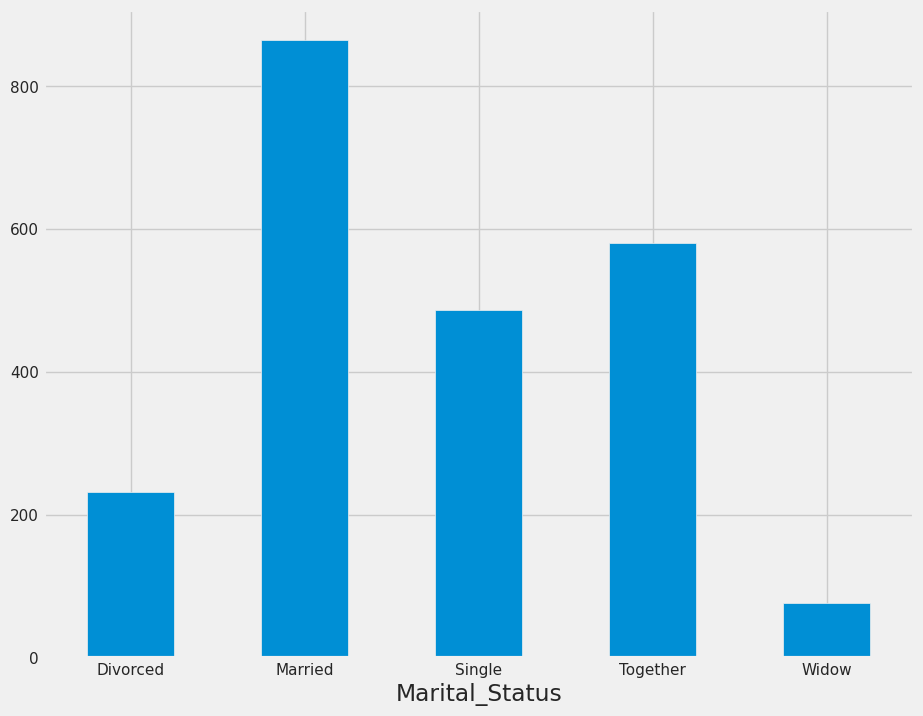

In [765]:
# Basic Visualization of some columns
Marital_Status = df.groupby("Marital_Status")["Marital_Status"].count()
Marital_Status.plot.bar(rot=0)

<Axes: xlabel='Education'>

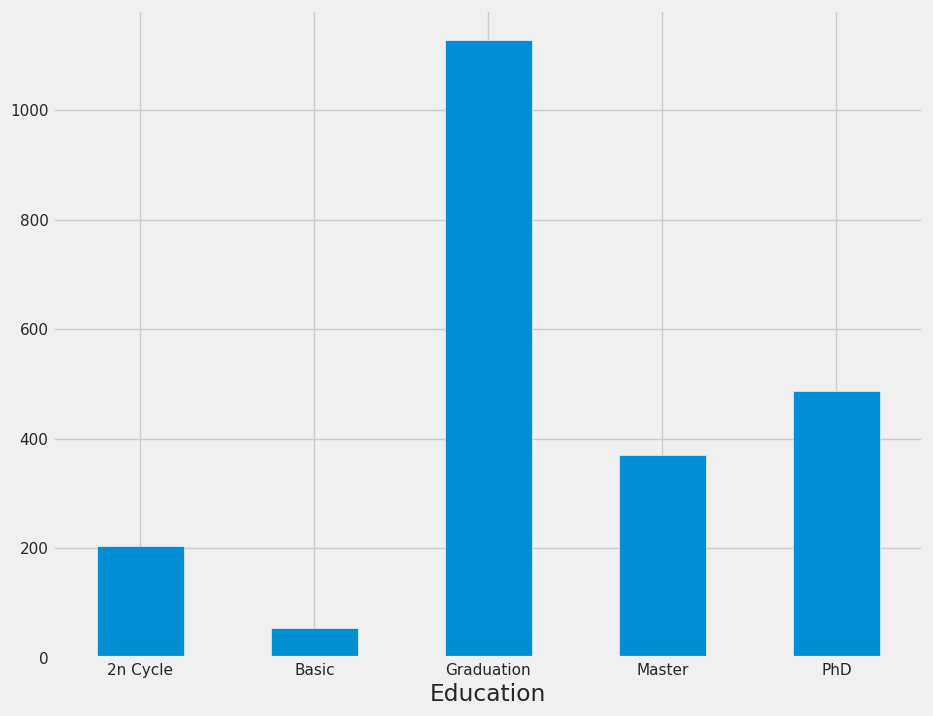

In [766]:
df.groupby("Education")["Education"].count().plot(kind="bar", rot=0)

#### Extracting New Characteristics

In [767]:
# Number of days since a customer started buying until the last recorded date
df["Customer_For"] = ((datetime.datetime.now()-pd.to_timedelta(df["Recency"])) - df["Dt_Customer"]).dt.days

In [768]:
# Age of the customer
df["Age"] = datetime.datetime.today().year - df["Year_Birth"]

In [769]:
# How much each customer has spent in the past 2 years
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [770]:
# How many underage people are living
df["Children"] = df["Kidhome"] + df["Teenhome"]

In [771]:
# How many people live in the same house
df["Family_Size"] = df["Children"] + 1 + df["Marital_Status"].apply(lambda x: 1 if x == "Married" or x == "Together" else 0)

In [772]:
# If customer is parent
df["Is_Parent"] = df["Children"].apply(lambda x: 1 if x > 0 else 0)

In [773]:
# Living situation
df["Living_With"] = df["Marital_Status"].apply(lambda x: "Partner" if x == "Married" or x == "Together" else "Alone")

In [774]:
# Age Group
def group_age(age):
    if age in range(21, 31):
        return "21-30"
    elif age in range(32, 41):
        return "31-40"
    elif age in range(41, 51):
        return "41-50"
    elif age in range(51, 61):
        return "51-60"
    elif age in range(61, 71):
        return "61-70"
    elif age in range(71, 81):
        return "71-80"
    elif age >= 81:
        return ">80"
    else:
        return "<21"

df["Age_Group"] = df["Age"].apply(group_age) 


#### Outliers

In [775]:
Over_80 = df["Age_Group"] == ">80"

# Removing some abnormal ages
Over_105 = df["Age"] < 105
df = df[Over_105]

In [776]:
# Average Spendings 
print(df["Spent"].mean())
Above_Average = df["Spent"] > 3*df["Spent"].mean()
df[Above_Average][["Spent", "Income"]]

# Remove overspenders
Over_Budget = df["Spent"] <= 2200
df = df[Over_Budget]

605.7434063477872


In [777]:
# Average Salary
df["Income"].mean()

# Remove high incomes
Normal_Income = df["Income"] <= 2*df["Income"].mean()
df = df[Normal_Income]

In [778]:
# Removing some outlier purchases
df = df[df["MntFruits"] <= 7*df["MntFruits"].mean()]

#### Examine the correlation between the data

<Axes: >

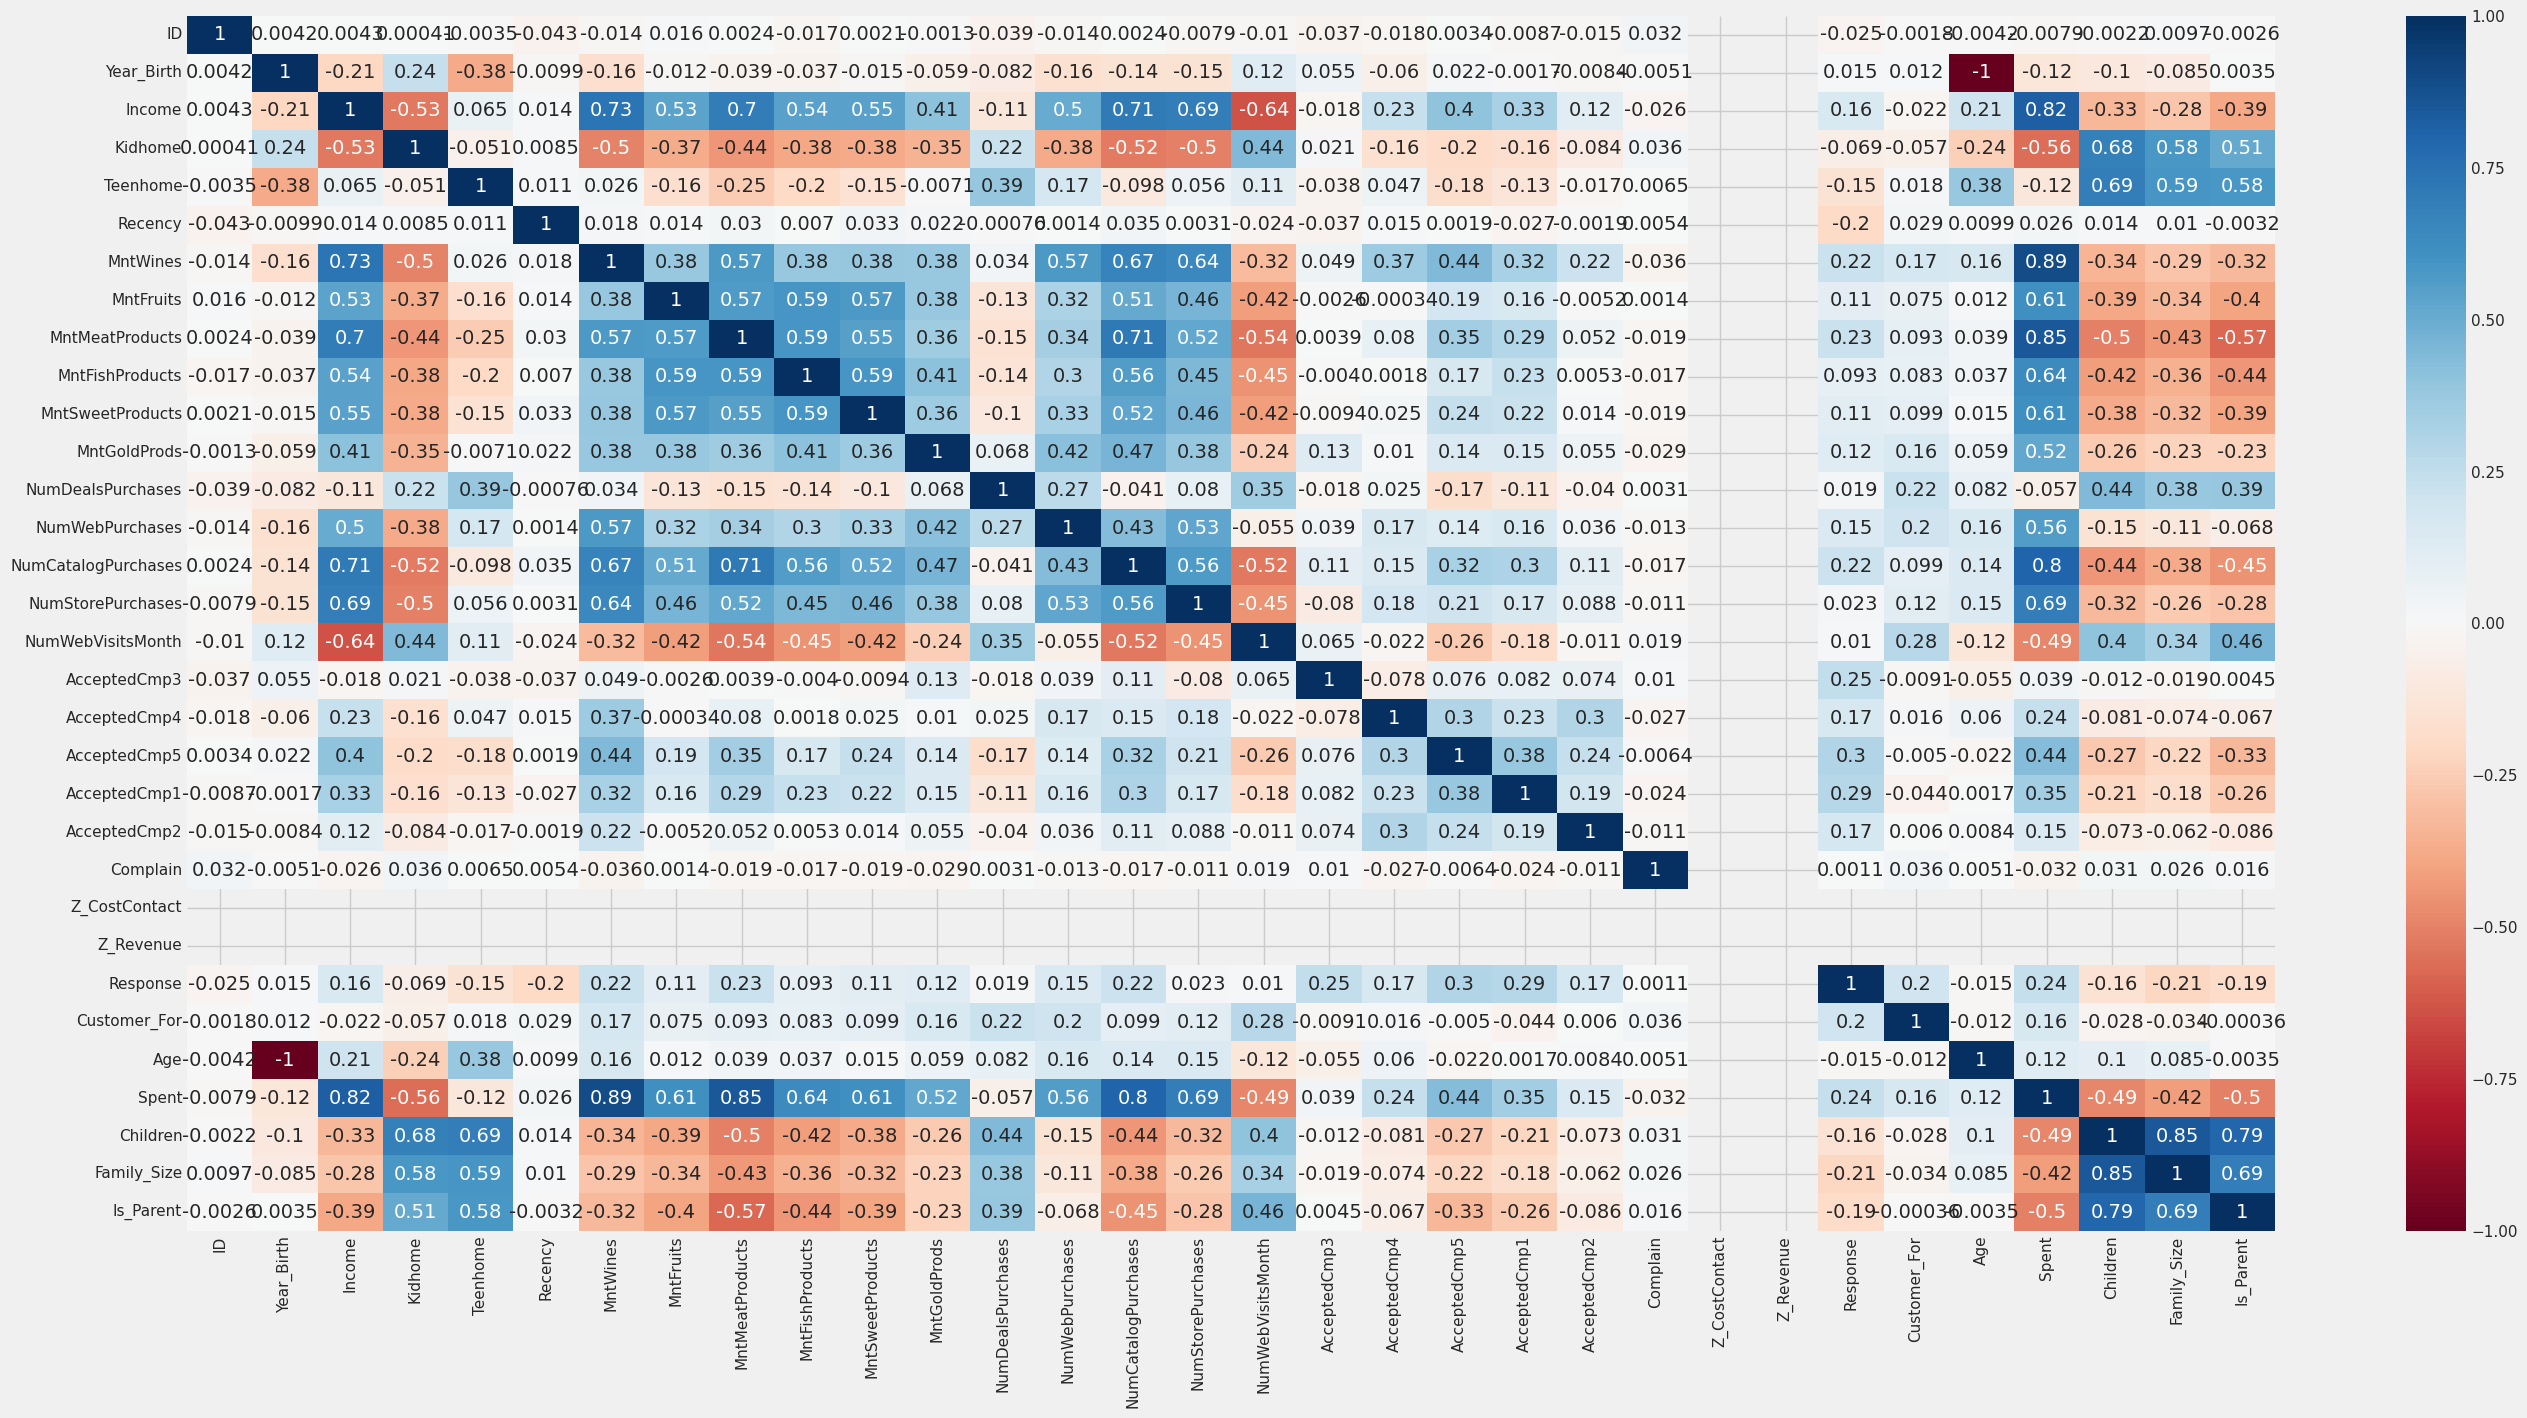

In [779]:
newdf = df.copy()
newdf = newdf.drop(["Education", "Marital_Status", "Dt_Customer", "Living_With", "Age_Group"], axis=1)
corr = newdf.corr()

plt.figure(figsize=(30, 15))
sb.heatmap(corr, cmap='RdBu', annot=True)

#### Extracting information from graphs - Giving answers to problems



##### In which category of Marital_Status does the largest percentage of the customers belong to?

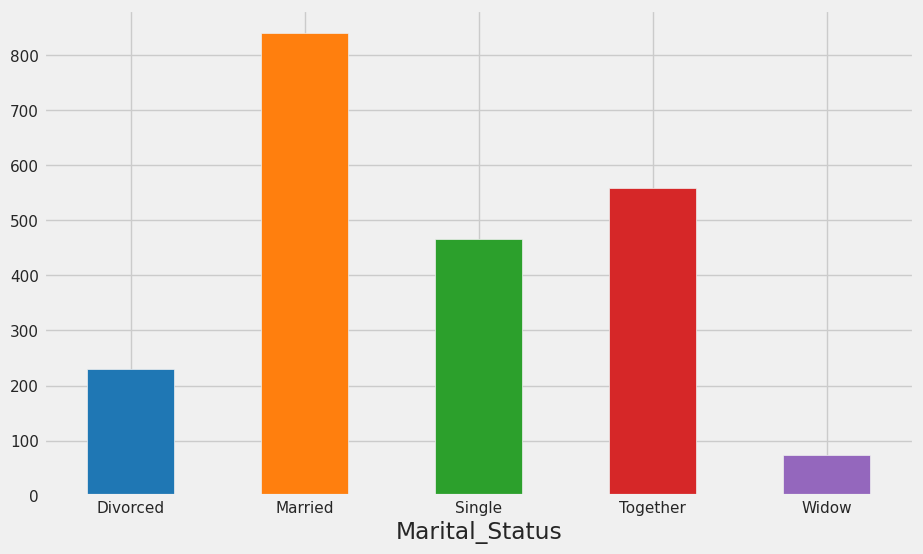

In [780]:
import matplotlib.colors as mcolors

plt.figure(figsize=(10, 6))
Marital_Status = df.groupby("Marital_Status")["Marital_Status"].count().plot.bar(rot=0, color=mcolors.TABLEAU_COLORS)

# graph = sb.FacetGrid(df, aspect=1.5)
# graph.map(sb.countplot, "Marital_Status")

# graph.set(xlabel="Marital Status", ylabel="Customers", title="Marital Status of Customers")

By grouping the Marital Status we can see from the bar plot that most of the customers are Married. 

##### How many customers have complained

[Text(0.5, 0, 'Complains'),
 Text(0, 0.5, 'Customers'),
 Text(0.5, 1.0, 'Customer Comlains')]

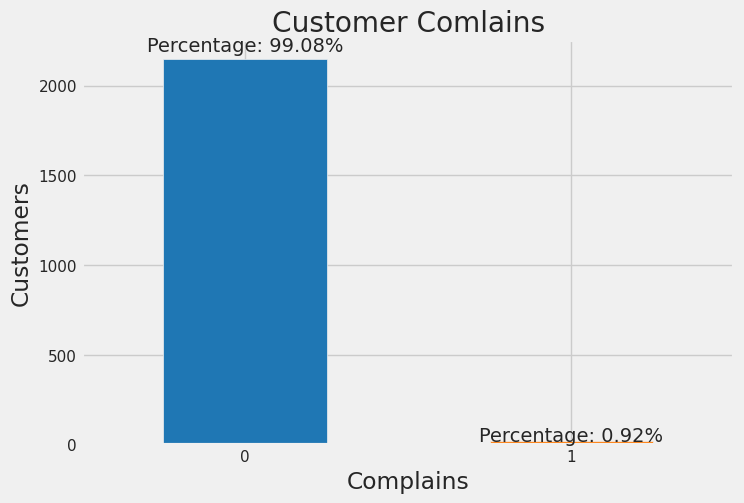

In [781]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

Complains = df.groupby("Complain")["Complain"].count()
plot = Complains.plot(ax=ax, kind="bar", rot=0, color=mcolors.TABLEAU_COLORS)

customers = Complains[0] + Complains[1]

for p in plot.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f"Percentage: {height/customers*100:.2f}%", (x + width/2, y + height*1.02), ha="center")

ax.set(xlabel="Complains", ylabel="Customers", title="Customer Comlains")

Only a small percentage of customers complain about their purchases

##### Relation between purchases and family status


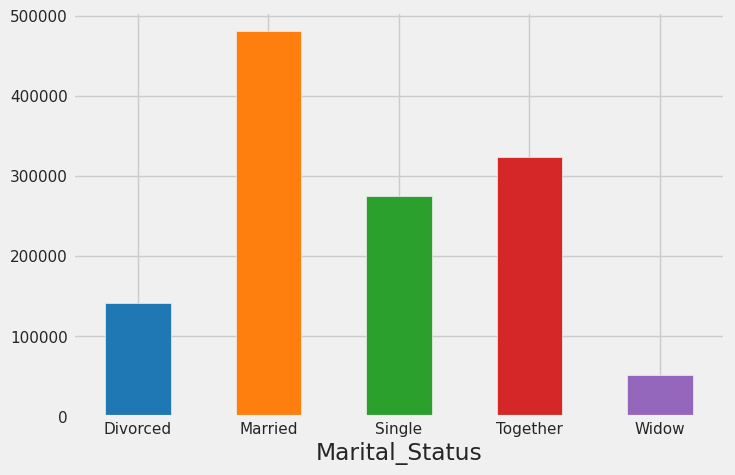

In [782]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

Family_Spend = df.groupby("Marital_Status")["Spent"].sum()
plot = Family_Spend.plot(kind="bar", rot=0, color=mcolors.TABLEAU_COLORS)



##### Correlation between Spending and Children and Family_Size

<Axes: xlabel='Family_Size', ylabel='Spent'>

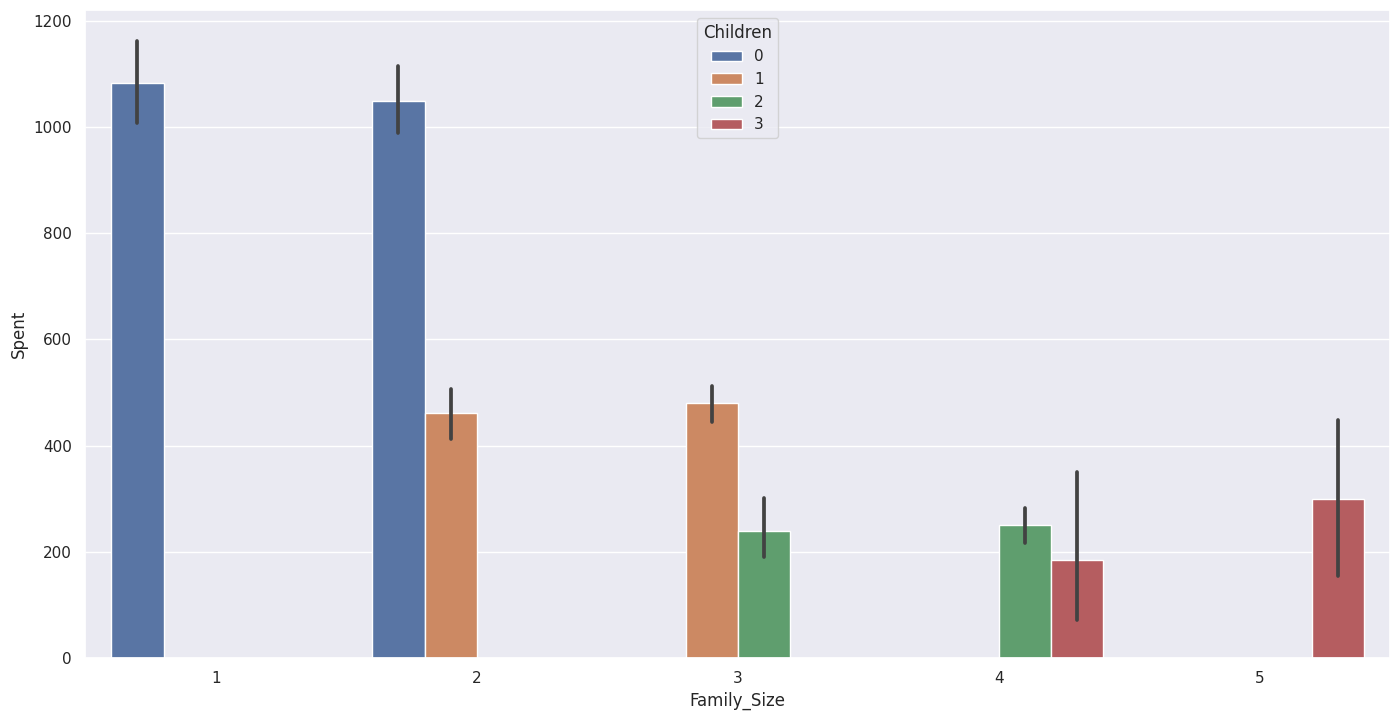

In [783]:

sb.set(rc={"figure.figsize":(15, 8)})
sb.barplot(data=df, x="Family_Size", y="Spent", hue="Children")
# sb.barplot(data=df, x="Family_Size", y="Spent", hue="Family_Size", palette="YlGnBu")

<Axes: xlabel='Family_Size', ylabel='Spent'>

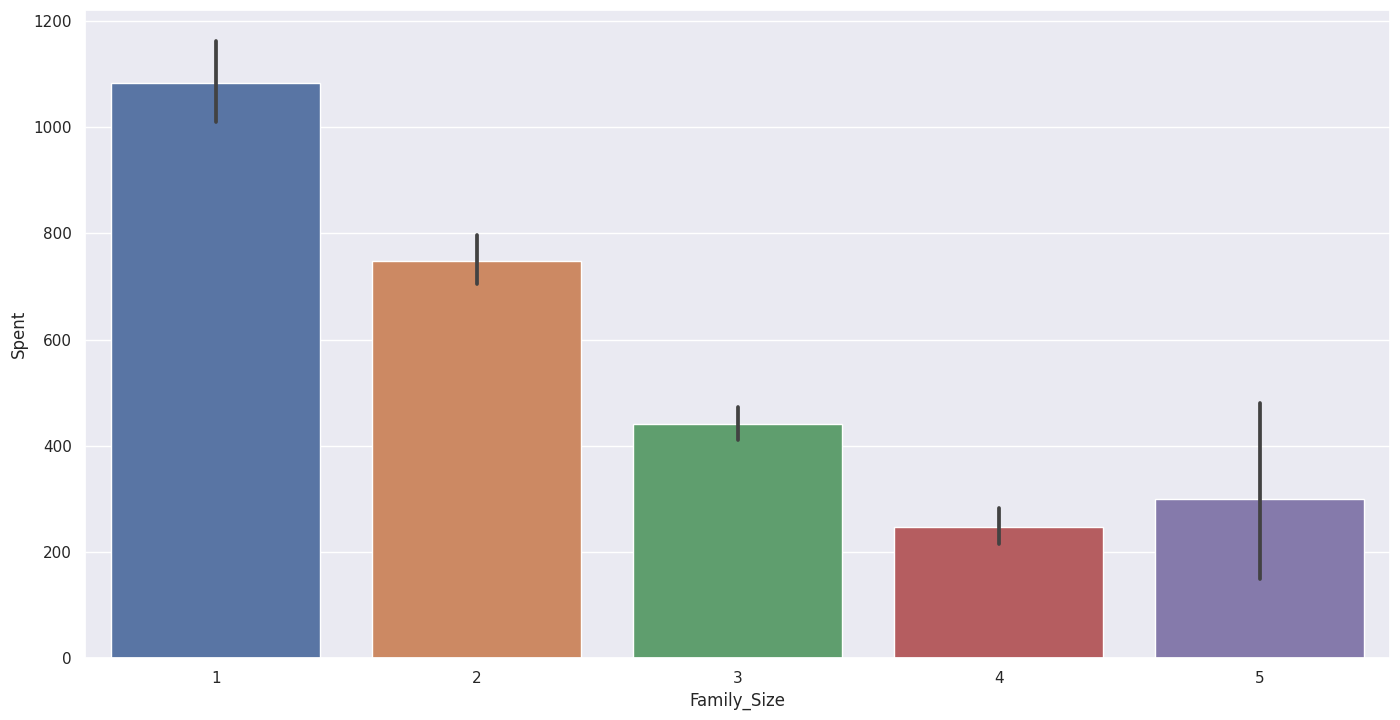

In [784]:
sb.set(rc={"figure.figsize":(15, 8)})
sb.barplot(data=df, x="Family_Size", y="Spent")

We can see that as the family expands and people have more children they tend to spend less

#### Correlation between the Age Group and their Spendings

<Axes: xlabel='Age_Group', ylabel='Spent'>

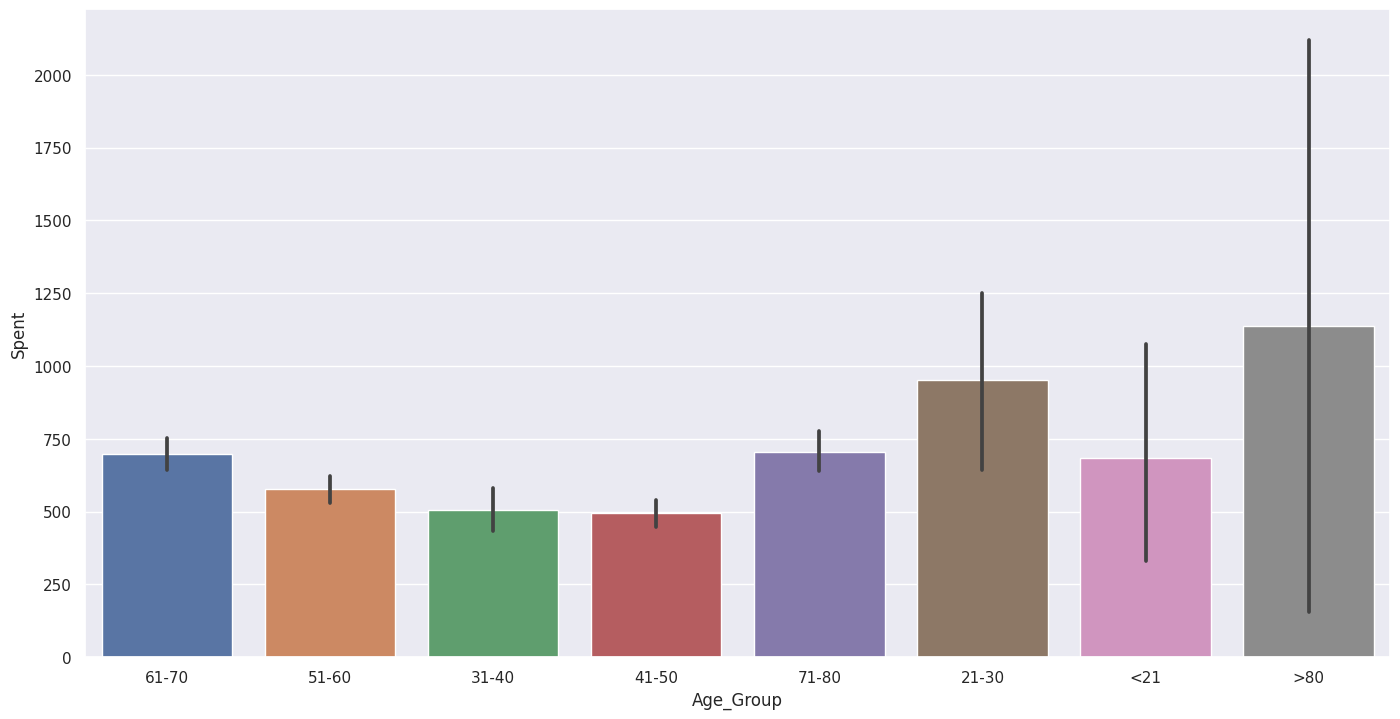

In [785]:
sb.set(rc={"figure.figsize":(15, 8)})
sb.barplot(data=df, x="Age_Group", y="Spent")

#### Correlation between Income and Spendings (Categorized in Family_Size groups)

<Axes: xlabel='Spent', ylabel='Income'>

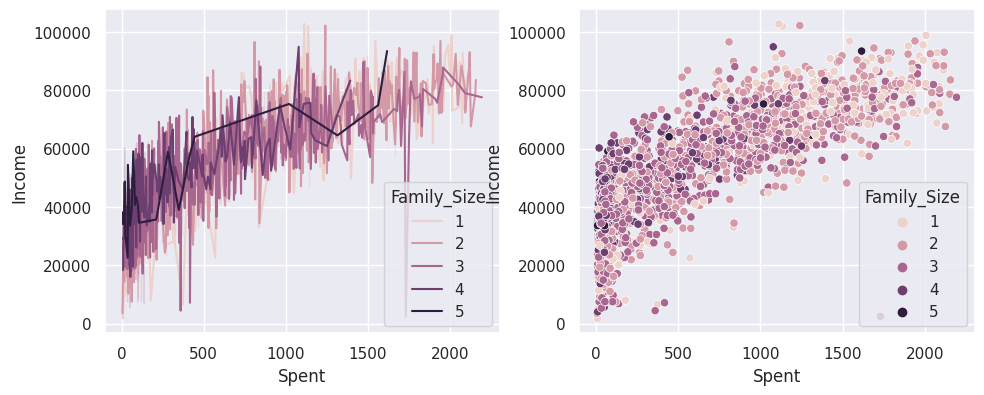

In [786]:
sb.set(rc={"figure.figsize":(15, 8)})

fig, axs = plt.subplots(1, 2, figsize=(10,4))

sb.lineplot(data=df, x="Spent", y="Income", hue="Family_Size", ax=axs[0])
sb.scatterplot(data=df, x="Spent", y="Income", hue="Family_Size", ax=axs[1])


From the graphs we acknowledge that as the income increases customers tend to spend more money!
Furthermore we can see that the smaller the Family_Size the more the customers are free to spend their money.
On the other hand the bigger families tend to be more cautious about their use of money.


#### Correalation between the Education and the customers' Income

<Axes: xlabel='Education', ylabel='Income'>

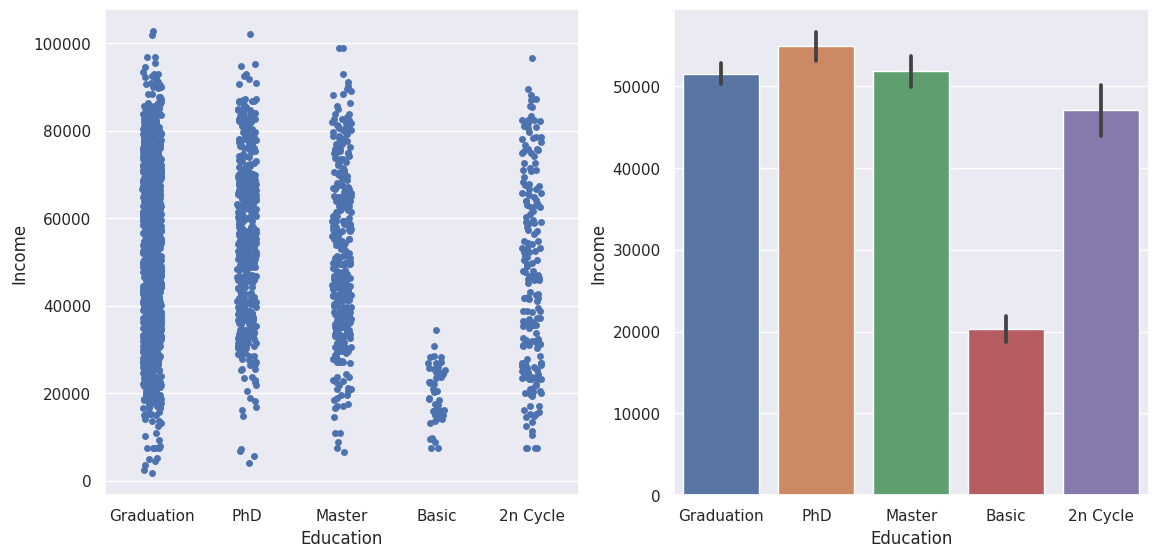

In [787]:
sb.set(rc={"figure.figsize":(10, 8)})

fig, axs = plt.subplots(1, 2, figsize=(12,6))

sb.stripplot(data=df, x="Education", y="Income", ax=axs[0])
sb.barplot(data=df, x="Education", y="Income", ax=axs[1])

From these charts we can extract the information that the Education does have an impact on the average customer's salary!
The Graduation students hold the largest percentage of our sample but we have enough data for the other categories of our interest. 
We can tell that the Mean/Average salary of the PhD's and Master's Education is slightly higher than of the Graduation's. 
Surprisingly enough the 2n Cycle Education customer gets paid less money than the Graduation, PhD and Master one.
 

#### Correlation between Income and Family Size and Children count

[Text(0.5, 1.0, 'Average Salary')]

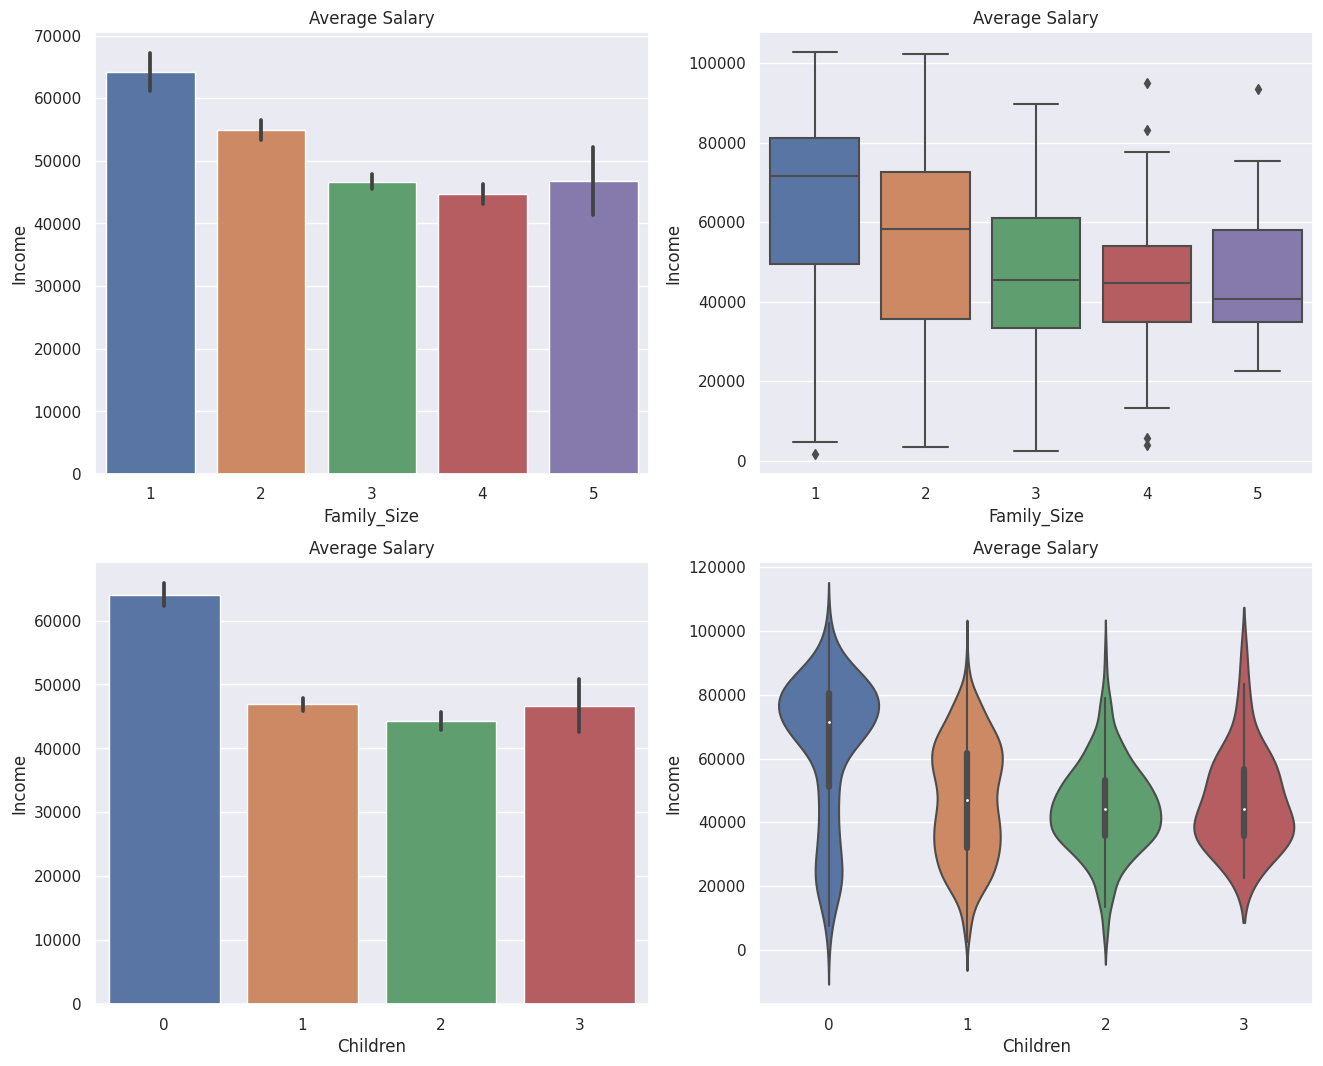

In [788]:
fig, axs = plt.subplots(2, 2, figsize=(14,12))

sb.barplot(data=df, x="Family_Size", y="Income", ax=axs[0][0]).set(title="Average Salary")
sb.boxplot(data=df, x="Family_Size", y="Income", ax=axs[0][1]).set(title="Average Salary")

sb.barplot(data=df, x="Children", y="Income", ax=axs[1][0]).set(title="Average Salary")
sb.violinplot(data=df, x="Children", y="Income", ax=axs[1][1]).set(title="Average Salary")

#### Relatioship between the Web Purchaces and the Web Visits

<Axes: xlabel='NumWebVisitsMonth', ylabel='NumWebPurchases'>

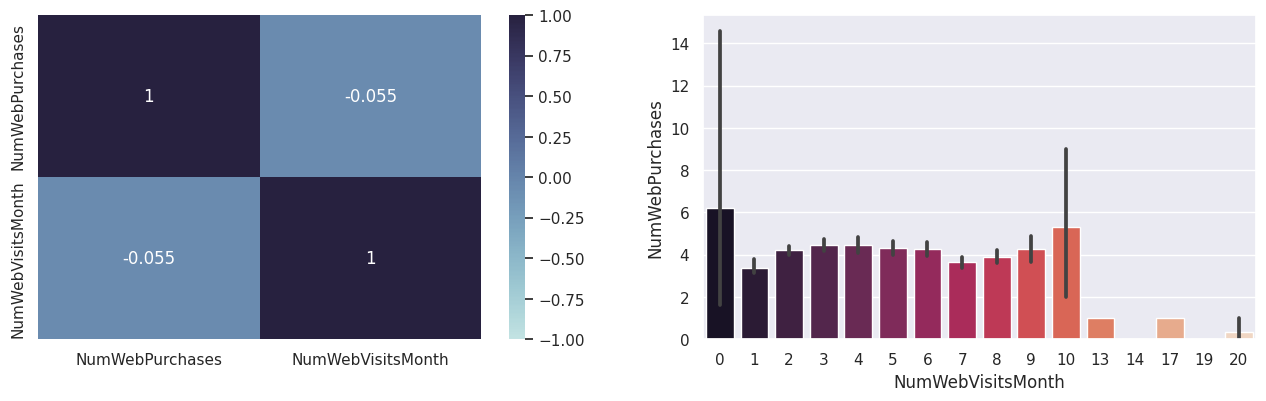

In [789]:
fig, axs = plt.subplots(1, 2, figsize=(14,4))

color = sb.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

sb.heatmap(data=df[["NumWebPurchases", "NumWebVisitsMonth"]].corr(), cmap=color, ax=axs[0], vmin=-1, vmax=1, annot=True)
sb.barplot(data=df, y="NumWebPurchases", x="NumWebVisitsMonth", palette="rocket", ax=axs[1])

#### Plotting the histogram of NumDealsPurchases, Income, Kidhome, Family_Size

<Axes: xlabel='Family_Size', ylabel='Count'>

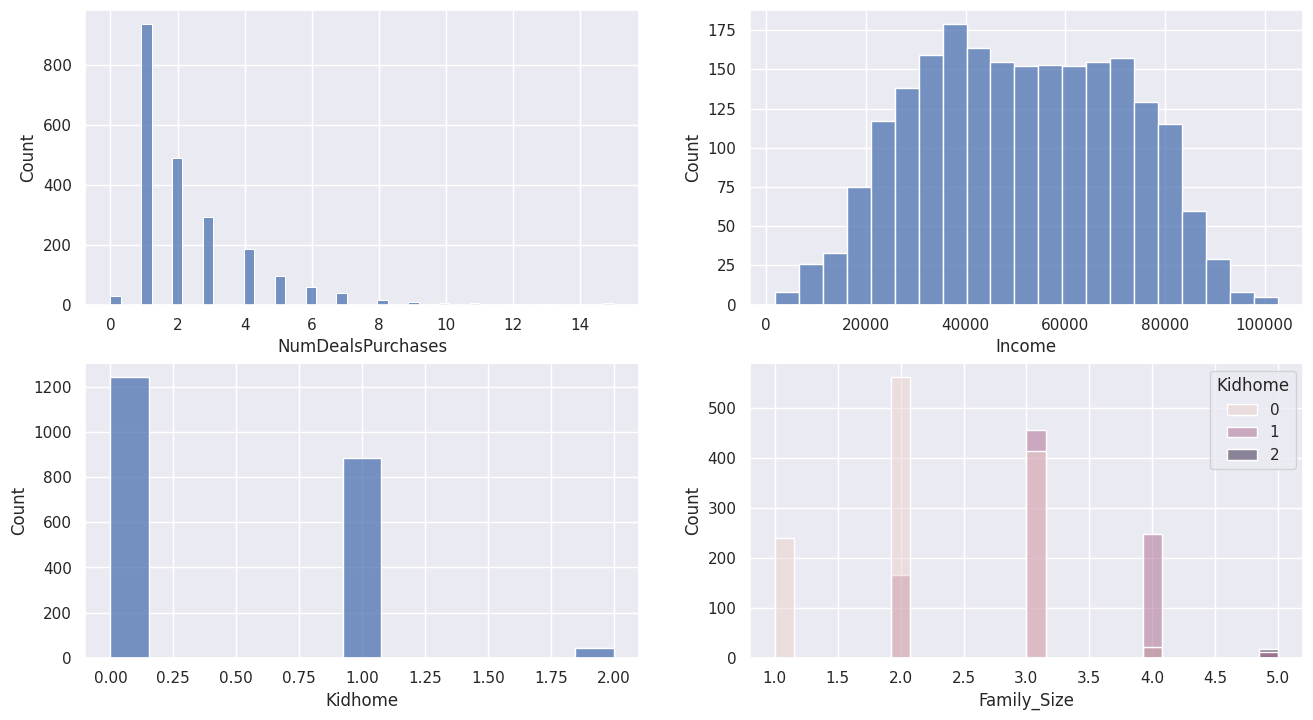

In [790]:
fig, axs = plt.subplots(2, 2, figsize=(14,8))

sb.histplot(data=df, x="NumDealsPurchases", ax=axs[0][0])
sb.histplot(data=df, x="Income", ax=axs[0][1])
sb.histplot(data=df, x="Kidhome", ax=axs[1][0])
sb.histplot(data=df, x="Family_Size", hue="Kidhome",ax=axs[1][1])


#### Do Master's Degree customers spend the most amount of money on Wines?

<Axes: xlabel='Education', ylabel='Spent'>

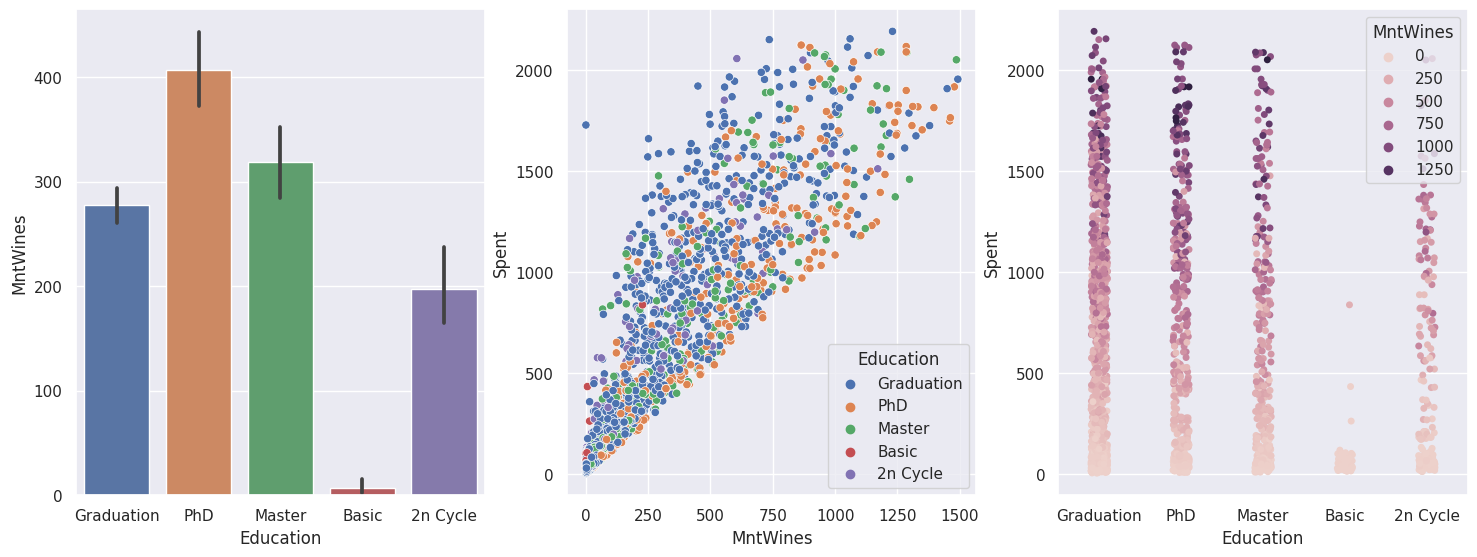

In [791]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

sb.barplot(data=df, x="Education", y="MntWines", ax=ax[0])
sb.scatterplot(data=df, x="MntWines", y="Spent", hue="Education", ax=ax[1])
sb.stripplot(data=df, x="Education", y="Spent", hue="MntWines", ax=ax[2])



#### Principal Component Analysis

In [792]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

label_enc = LabelEncoder()
df["Education_Cat"] = label_enc.fit_transform(df["Education"])
df["Marital_Status_Cat"] = label_enc.fit_transform(df["Marital_Status"])
df["Living_With_Cat"] = label_enc.fit_transform(df["Living_With"])

one_hot_enc = OneHotEncoder()
enc_df = pd.DataFrame(one_hot_enc.fit_transform(df[["Education_Cat", "Marital_Status_Cat", "Living_With_Cat"]]).toarray())

df = df.join(enc_df)

df = df.dropna()
df.tail(69)




,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,2,3,4,5,6,7,8,9,10,11
2099,3422,1975,Graduation,Married,76068.0,0,1,2012-11-29,67,1115,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2100,1055,1976,Master,Married,53204.0,1,1,2014-03-20,40,29,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2101,6544,1949,PhD,Together,67911.0,0,1,2014-05-22,63,529,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2102,1241,1984,2n Cycle,Married,14796.0,1,0,2012-09-17,1,13,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2103,2909,1974,PhD,Married,78128.0,0,1,2014-02-19,89,934,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,7600,1992,Basic,Single,15253.0,1,0,2013-10-28,13,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2165,9706,1974,PhD,Single,31560.0,1,0,2013-06-24,98,62,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2166,2429,1954,Graduation,Divorced,72071.0,0,1,2013-02-14,4,531,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2167,3520,1990,Master,Single,91172.0,0,0,2013-03-27,94,162,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [793]:
newdf = df.copy()
newdf.columns = newdf.columns.astype(str)


In [794]:
newdf = newdf.drop(["Age_Group", "Dt_Customer", "Education", "Marital_Status", "Living_With", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain", "Response"], axis=1)

In [795]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

std_df = scaler.fit_transform(newdf)


In [796]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca.fit(std_df)

pca_result = pca.transform(std_df)



#### Clustering


/home/egoeimai/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/egoeimai/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/egoeimai/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/egoeimai/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/egoeimai/.local/lib/py

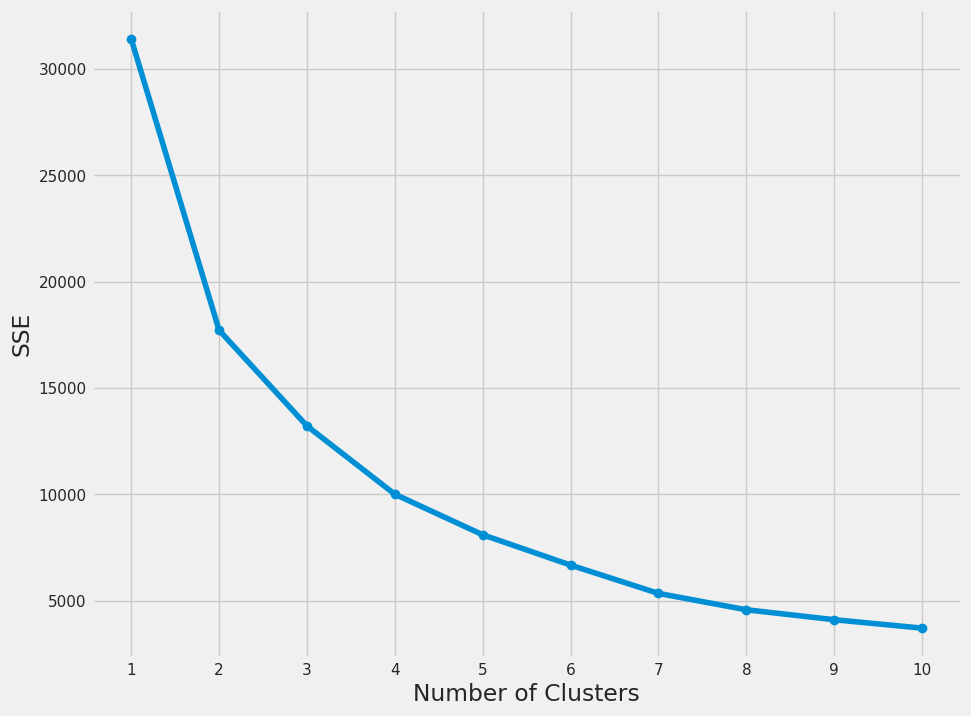

In [797]:
from sklearn.cluster import KMeans

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_result)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,11), sse, 'o-')
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.grid(True)
plt.show()


/home/egoeimai/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


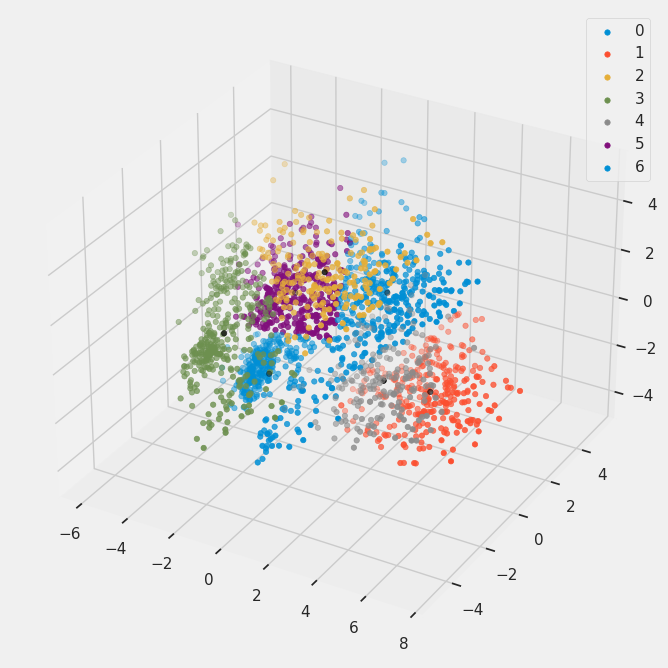

[4 3 1 ... 4 1 1]


In [798]:
kmeans = KMeans(n_clusters=7)

label = kmeans.fit_predict(pca_result)

centroids = kmeans.cluster_centers_
labels = np.unique(label)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for l in labels:
    # print(l)
    ax.scatter(pca_result[label == l, 0], pca_result[label == l, 1], pca_result[label == l, 2], s=15, label=l)

ax.scatter(centroids[:,0] , centroids[:,1], centroids[:,2],s=15, color='black')
ax.legend()
plt.show()

print(kmeans.labels_)


/home/egoeimai/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


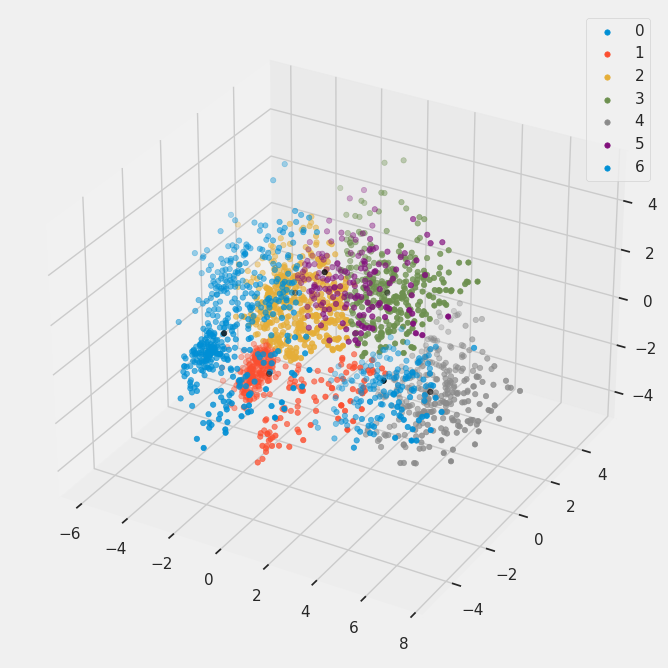

In [799]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

ag = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
label = ag.fit_predict(pca_result)

labels = np.unique(label)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for l in labels:
    ax.scatter(pca_result[label == l, 0], pca_result[label == l, 1], pca_result[label == l, 2], s=15, label=l)

ax.scatter(centroids[:,0] , centroids[:,1], centroids[:,2],s=15, color='black')
ax.legend()
plt.show()